<a href="https://colab.research.google.com/github/felipetryt12/4GeeksAcademy/blob/master/Trabajo_Explaratorio_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")
import numpy as np
from sklearn.metrics import confusion_matrix


url="https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
data = pd.read_csv(url, header=None, na_values=" ?")
# Se etiquetan las columnas para poder interpretar más fácilmente los datos.
# Cada fila es un ejemplo, cada columna un atributo.
# La columna llamada C es el atributo a predecir
data.columns = ['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education-num', 'Marital-status', 'Occupation',
              'Relationship', 'Race', 'Sex', 'Capital-gain', 'Capital-loss', 'Hpw', 'Country', 'C']
data.head()



,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hpw,Country,C
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
print(data.shape)

(32561, 15)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       30725 non-null  object
 2   Fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education-num   32561 non-null  int64 
 5   Marital-status  32561 non-null  object
 6   Occupation      30718 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital-gain    32561 non-null  int64 
 11  Capital-loss    32561 non-null  int64 
 12  Hpw             32561 non-null  int64 
 13  Country         31978 non-null  object
 14  C               32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
data.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education-num        0
Marital-status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital-gain         0
Capital-loss         0
Hpw                  0
Country            583
C                    0
dtype: int64

In [ ]:
dup=data.duplicated().sum()
print(dup)

24


In [ ]:
registros_dup=data[data.duplicated(keep=False)]
registros_dup

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hpw,Country,C
2303,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
3917,19,Private,251579,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,14,United-States,<=50K
4325,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
4767,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
4940,38,Private,207202,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,48,United-States,>50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
5579,27,Private,255582,HS-grad,9,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States,<=50K
5805,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
5842,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K


In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
print(data.shape)

(32537, 15)


In [ ]:
data.head(20)

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hpw,Country,C
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [ ]:
data['Marital-status'].value_counts()

Marital-status
 Married-civ-spouse       14970
 Never-married            10667
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: count, dtype: int64

[Text(0, 0.5, '')]

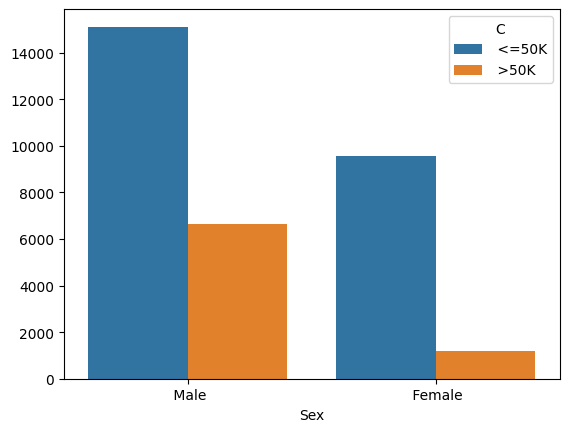

In [ ]:
sns.countplot(data = data, x = "Sex", hue='C').set(ylabel = None)

In [ ]:
data.Age.describe()

count    32537.000000
mean        38.585549
std         13.637984
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: Age, dtype: float64

In [ ]:
data.loc[data.Age==17]

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hpw,Country,C
106,17,NaN,304873,10th,6,Never-married,NaN,Own-child,White,Female,34095,0,32,United-States,<=50K
209,17,Private,65368,11th,7,Never-married,Sales,Own-child,White,Female,0,0,12,United-States,<=50K
262,17,Private,245918,11th,7,Never-married,Other-service,Own-child,White,Male,0,0,12,United-States,<=50K
271,17,Private,191260,9th,5,Never-married,Other-service,Own-child,White,Male,1055,0,24,United-States,<=50K
335,17,Private,270942,5th-6th,3,Never-married,Other-service,Other-relative,White,Male,0,0,48,Mexico,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31772,17,NaN,256173,10th,6,Never-married,NaN,Own-child,White,Female,0,0,15,United-States,<=50K
31864,17,Private,214787,12th,8,Never-married,Adm-clerical,Own-child,White,Female,0,0,25,United-States,<=50K
31959,17,Private,24090,HS-grad,9,Never-married,Exec-managerial,Own-child,White,Female,0,0,35,United-States,<=50K
32282,17,Private,311907,11th,7,Never-married,Other-service,Own-child,White,Male,0,0,25,United-States,<=50K


In [ ]:
data['age_range'] = pd.cut(data['Age'],bins=[0,17,30,45,70, float('inf')],
                labels=['>=17', '17-30', '30-45','45-70','>70'],include_lowest=True)

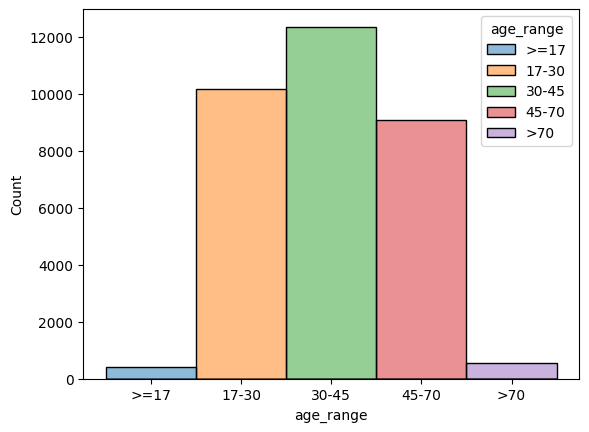

In [ ]:
sns.histplot(x='age_range',hue='age_range',data=data)

plt.show()

In [ ]:
data.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education-num',
       'Marital-status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital-gain', 'Capital-loss', 'Hpw', 'Country', 'C', 'age_range'],
      dtype='object')

In [ ]:
cols_drop=['Fnlwgt','Relationship','Education-num','Capital-gain','Capital-loss']
data.drop(cols_drop,axis=1,inplace=True)

In [ ]:
data.columns

Index(['Age', 'Workclass', 'Education', 'Marital-status', 'Occupation', 'Race',
       'Sex', 'Hpw', 'Country', 'C', 'age_range'],
      dtype='object')

In [ ]:
data.isnull().sum()

Age                  0
Workclass         1836
Education            0
Marital-status       0
Occupation        1843
Race                 0
Sex                  0
Hpw                  0
Country            582
C                    0
age_range            0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             32537 non-null  int64   
 1   Workclass       30701 non-null  object  
 2   Education       32537 non-null  object  
 3   Marital-status  32537 non-null  object  
 4   Occupation      30694 non-null  object  
 5   Race            32537 non-null  object  
 6   Sex             32537 non-null  object  
 7   Hpw             32537 non-null  int64   
 8   Country         31955 non-null  object  
 9   C               32537 non-null  object  
 10  age_range       32537 non-null  category
dtypes: category(1), int64(2), object(8)
memory usage: 2.8+ MB


### Factorizacion

In [ ]:
data["Workclass_f"] = pd.factorize(data["Workclass"])[0]
data["Education_f"] = pd.factorize(data["Education"])[0]
data["Marital-status_f"] = pd.factorize(data["Marital-status"])[0]
data['Occupation_f']=pd.factorize(data["Occupation"])[0]
data['Race_f']=pd.factorize(data["Race"])[0]
data['Sex_f']=pd.factorize(data["Sex"])[0]
data['Country_f']=pd.factorize(data["Country"])[0]
data['C_f']=pd.factorize(data["C"])[0]

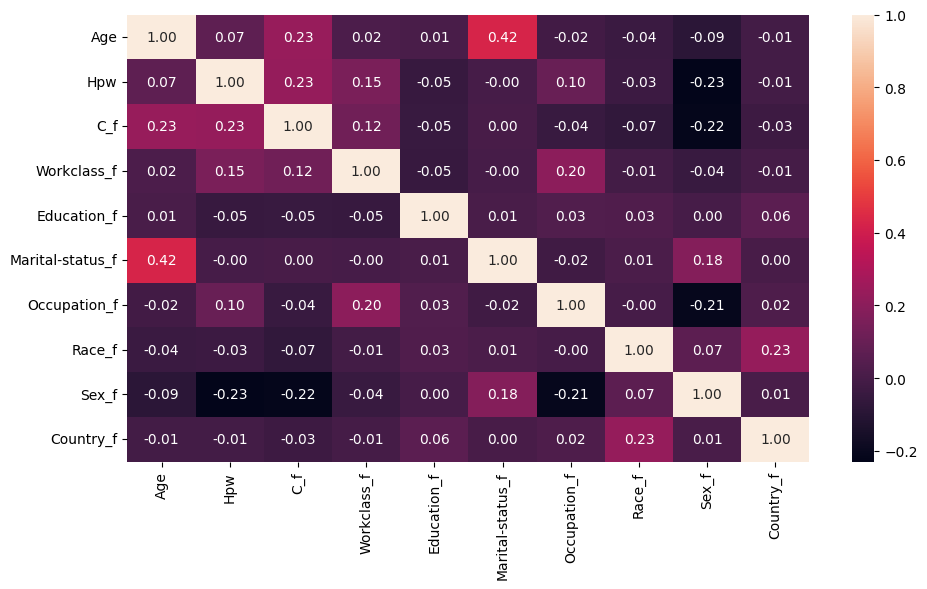

In [ ]:
fig, axis = plt.subplots(figsize = (10, 6))
matriz_corr=data[['Age','Hpw','C_f','Workclass_f','Education_f','Marital-status_f','Occupation_f','Race_f','Sex_f','Country_f']].corr()
#print(matriz_corr)
sns.heatmap(matriz_corr, annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

In [ ]:
data.isnull().sum()

Age                    0
Workclass           1836
Education              0
Marital-status         0
Occupation          1843
Race                   0
Sex                    0
Hpw                    0
Country              582
C                      0
age_range              0
Workclass_f            0
Education_f            0
Marital-status_f       0
Occupation_f           0
Race_f                 0
Sex_f                  0
Country_f              0
C_f                    0
dtype: int64

In [ ]:
data['Occupation'].value_counts()

Occupation
 Prof-specialty       4136
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3768
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: count, dtype: int64

In [ ]:
data= data.dropna()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30139 entries, 0 to 32560
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Age               30139 non-null  int64   
 1   Workclass         30139 non-null  object  
 2   Education         30139 non-null  object  
 3   Marital-status    30139 non-null  object  
 4   Occupation        30139 non-null  object  
 5   Race              30139 non-null  object  
 6   Sex               30139 non-null  object  
 7   Hpw               30139 non-null  int64   
 8   Country           30139 non-null  object  
 9   C                 30139 non-null  object  
 10  age_range         30139 non-null  category
 11  Workclass_f       30139 non-null  int64   
 12  Education_f       30139 non-null  int64   
 13  Marital-status_f  30139 non-null  int64   
 14  Occupation_f      30139 non-null  int64   
 15  Race_f            30139 non-null  int64   
 16  Sex_f             30139 non

In [ ]:
data['Sex'].value_counts()

Sex
 Male      20366
 Female     9773
Name: count, dtype: int64

### Revision de datos atipicos

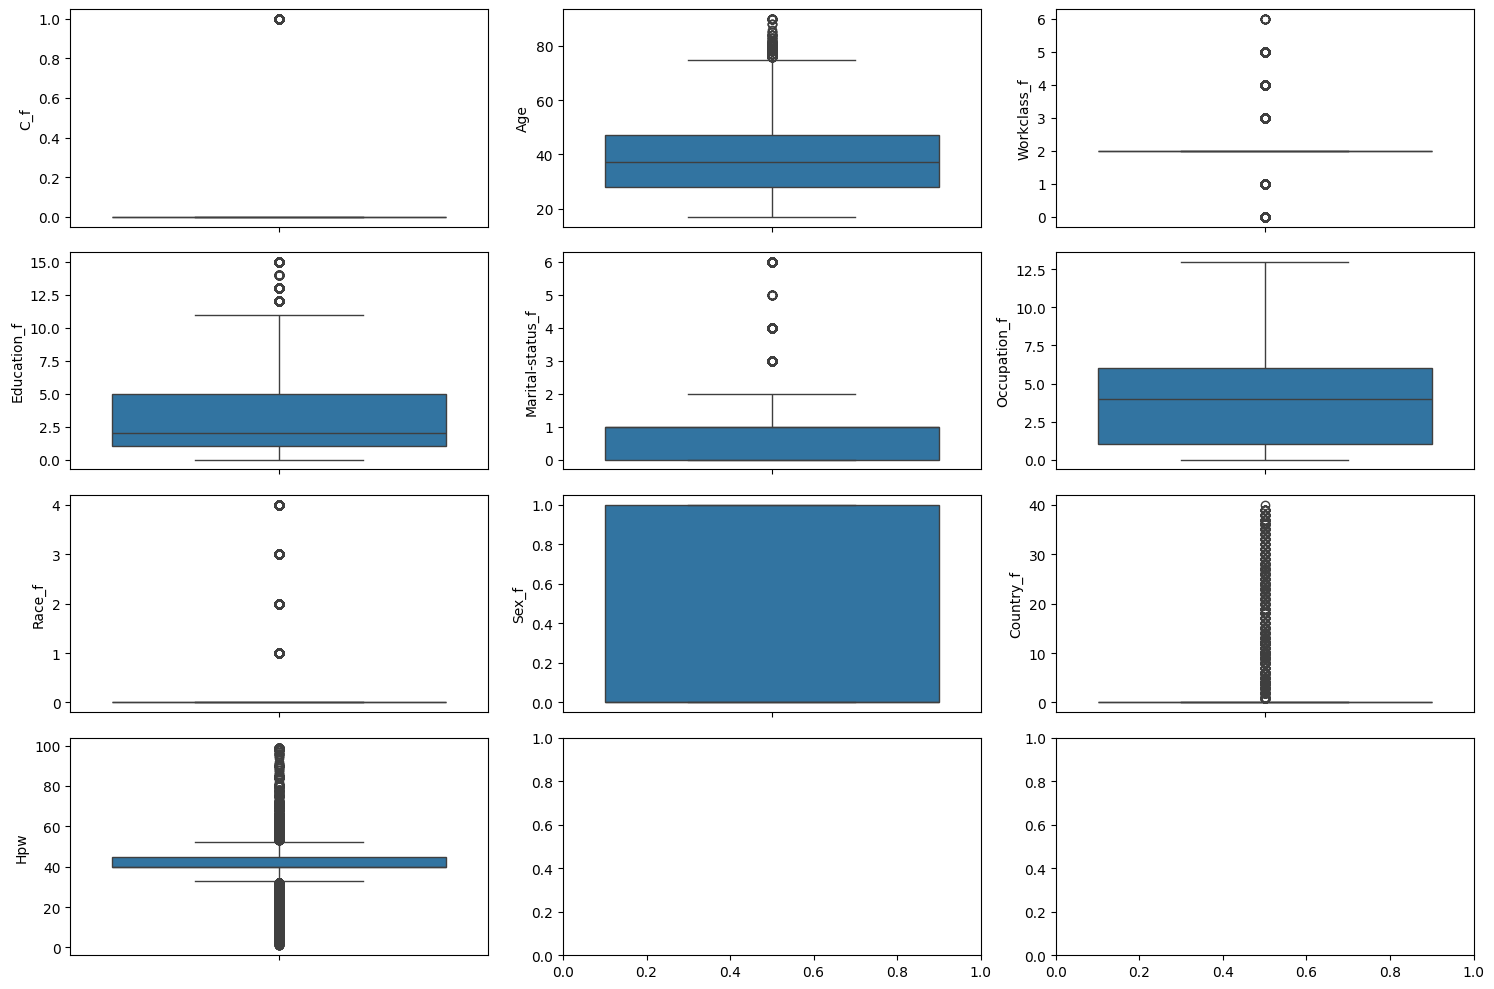

In [ ]:
fig, axis = plt.subplots(4, 3, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = data, y = "C_f")
sns.boxplot(ax = axis[0, 1], data = data, y = "Age")
sns.boxplot(ax = axis[0, 2], data = data, y = "Workclass_f")
sns.boxplot(ax = axis[1, 0], data = data, y = "Education_f")
sns.boxplot(ax = axis[1, 1], data = data, y = "Marital-status_f")
sns.boxplot(ax = axis[1, 2], data = data, y = "Occupation_f")
sns.boxplot(ax = axis[2, 0], data = data, y = "Race_f")
sns.boxplot(ax = axis[2, 1], data = data, y = "Sex_f")
sns.boxplot(ax = axis[2, 2], data = data, y = "Country_f")
sns.boxplot(ax = axis[3, 0], data = data, y = "Hpw")

plt.tight_layout()
plt.show()

In [ ]:
# Valores atipicos Age y Hpw
age_c = data["Age"].describe()


age_iqr = age_c["75%"] - age_c["25%"]
upper_limit = age_c["75%"] + 1.5 * age_iqr
lower_limit = age_c["25%"] - 1.5 * age_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(age_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 75.5 y -0.5, con un rango intercuartílico de 19.0


In [ ]:
data.loc[data.Age>=75.5]

,Age,Workclass,Education,Marital-status,Occupation,Race,Sex,Hpw,Country,C,age_range,Workclass_f,Education_f,Marital-status_f,Occupation_f,Race_f,Sex_f,Country_f,C_f
74,79,Private,Some-college,Married-civ-spouse,Prof-specialty,White,Male,20,United-States,<=50K,>70,2,5,1,3,0,0,0,0
100,76,Private,Masters,Married-civ-spouse,Exec-managerial,White,Male,40,United-States,>50K,>70,2,3,1,1,0,0,0,1
222,90,Private,HS-grad,Never-married,Other-service,Black,Male,40,United-States,<=50K,>70,2,1,0,4,1,0,0,0
316,77,Self-emp-not-inc,Some-college,Married-civ-spouse,Sales,White,Male,40,United-States,<=50K,>70,1,5,1,5,0,0,0,0
324,76,Self-emp-not-inc,Masters,Married-civ-spouse,Craft-repair,White,Male,10,United-States,<=50K,>70,1,3,1,6,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31814,80,Self-emp-not-inc,7th-8th,Never-married,Farming-fishing,White,Male,20,United-States,<=50K,>70,1,8,0,8,0,0,0,0
31855,82,Self-emp-not-inc,HS-grad,Married-civ-spouse,Farming-fishing,White,Male,20,United-States,<=50K,>70,1,1,1,8,0,0,0,0
32277,90,Private,HS-grad,Widowed,Adm-clerical,White,Female,25,United-States,<=50K,>70,2,1,6,0,0,1,0,0
32367,90,Local-gov,7th-8th,Married-civ-spouse,Protective-serv,White,Male,40,United-States,<=50K,>70,4,8,1,11,0,0,0,0


In [ ]:
data=data[data['Age']<=75.5]

In [ ]:
print(data.shape)

(29971, 19)


In [ ]:
data.columns

Index(['Age', 'Workclass', 'Education', 'Marital-status', 'Occupation', 'Race',
       'Sex', 'Hpw', 'Country', 'C', 'age_range', 'Workclass_f', 'Education_f',
       'Marital-status_f', 'Occupation_f', 'Race_f', 'Sex_f', 'Country_f',
       'C_f'],
      dtype='object')

In [ ]:
hpw_c = data["Hpw"].describe()

hpw_iqr = hpw_c["75%"] - hpw_c["25%"]
upper_limit = hpw_c["75%"] + 1.5 * hpw_iqr
lower_limit = hpw_c["25%"] - 1.5 * hpw_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(hpw_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 52.5 y 32.5, con un rango intercuartílico de 5.0


In [ ]:
data.Hpw.describe()

count    29971.000000
mean        41.002536
std         11.920328
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: Hpw, dtype: float64

In [ ]:
data.loc[data.Hpw<=10]

,Age,Workclass,Education,Marital-status,Occupation,Race,Sex,Hpw,Country,C,age_range,Workclass_f,Education_f,Marital-status_f,Occupation_f,Race_f,Sex_f,Country_f,C_f
157,71,Self-emp-not-inc,Some-college,Separated,Sales,Black,Male,2,United-States,<=50K,>70,1,5,4,5,1,0,0,0
189,58,State-gov,Doctorate,Married-civ-spouse,Prof-specialty,White,Male,1,United-States,>50K,45-70,0,9,1,3,0,0,0,1
371,17,Private,11th,Never-married,Other-service,White,Male,10,United-States,<=50K,>=17,2,2,0,4,0,0,0,0
375,20,Local-gov,Some-college,Never-married,Adm-clerical,White,Female,10,United-States,<=50K,17-30,4,5,0,0,0,1,0,0
387,44,Private,Some-college,Married-civ-spouse,Adm-clerical,White,Female,6,United-States,>50K,30-45,2,5,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32159,46,Private,Bachelors,Never-married,Machine-op-inspct,White,Female,8,United-States,<=50K,45-70,2,0,0,9,0,1,0,0
32244,58,Self-emp-not-inc,HS-grad,Divorced,Farming-fishing,White,Female,10,United-States,<=50K,45-70,1,1,2,8,0,1,0,0
32284,26,Private,Bachelors,Never-married,Exec-managerial,White,Male,10,United-States,<=50K,17-30,2,0,0,1,0,0,0,0
32316,23,Federal-gov,HS-grad,Never-married,Armed-Forces,White,Male,8,United-States,<=50K,17-30,3,1,0,12,0,0,0,0


In [ ]:
data.columns

Index(['Age', 'Workclass', 'Education', 'Marital-status', 'Occupation', 'Race',
       'Sex', 'Hpw', 'Country', 'C', 'age_range', 'Workclass_f', 'Education_f',
       'Marital-status_f', 'Occupation_f', 'Race_f', 'Sex_f', 'Country_f',
       'C_f'],
      dtype='object')

<Axes: xlabel='C', ylabel='count'>

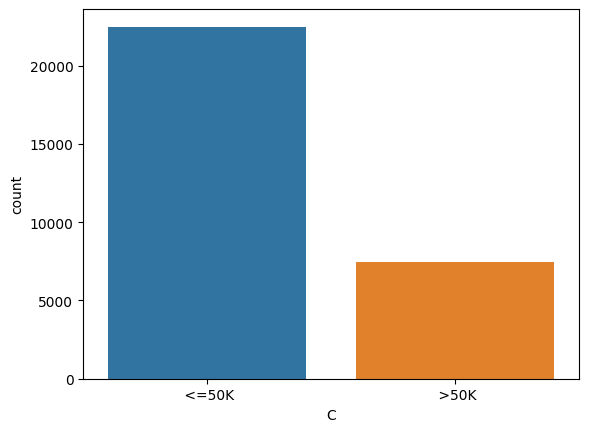

In [ ]:
sns.countplot(data=data,x='C',hue='C')

<Axes: xlabel='C', ylabel='count'>

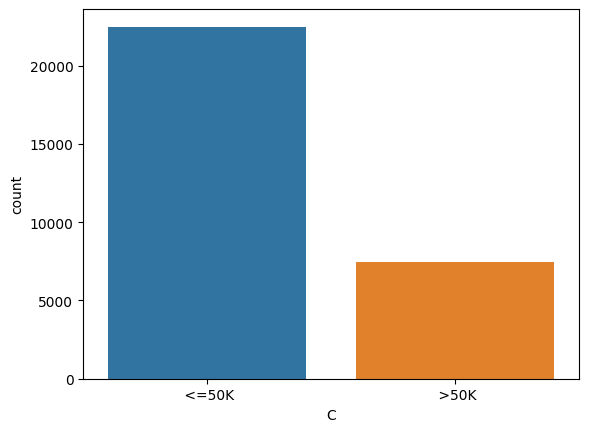

In [ ]:
sns.countplot(data=data,x='C',hue='C')

In [ ]:
g = data.groupby('C')
dataBal = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))
dataBal.reset_index(drop=True,inplace=True)
dataBal


,Age,Workclass,Education,Marital-status,Occupation,Race,Sex,Hpw,Country,C,age_range,Workclass_f,Education_f,Marital-status_f,Occupation_f,Race_f,Sex_f,Country_f,C_f
0,25,Self-emp-inc,Assoc-voc,Never-married,Transport-moving,White,Male,55,United-States,<=50K,17-30,5,7,0,7,0,0,0,0
1,60,Private,HS-grad,Divorced,Protective-serv,White,Male,40,United-States,<=50K,45-70,2,1,2,11,0,0,0,0
2,22,Private,Some-college,Never-married,Transport-moving,White,Male,20,United-States,<=50K,17-30,2,5,0,7,0,0,0,0
3,20,Private,Some-college,Never-married,Prof-specialty,Black,Female,20,United-States,<=50K,17-30,2,5,0,3,1,1,0,0
4,50,Self-emp-not-inc,Bachelors,Divorced,Exec-managerial,White,Male,30,United-States,<=50K,45-70,1,0,2,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14949,44,Federal-gov,Bachelors,Married-civ-spouse,Exec-managerial,Asian-Pac-Islander,Male,40,United-States,>50K,30-45,3,0,1,1,2,0,0,1
14950,39,Private,Bachelors,Married-civ-spouse,Craft-repair,White,Male,45,United-States,>50K,30-45,2,0,1,6,0,0,0,1
14951,32,Private,Bachelors,Married-civ-spouse,Sales,Black,Male,50,United-States,>50K,30-45,2,0,1,5,1,0,0,1
14952,38,Private,Bachelors,Married-civ-spouse,Exec-managerial,White,Male,50,United-States,>50K,30-45,2,0,1,1,0,0,0,1


<Axes: xlabel='C', ylabel='count'>

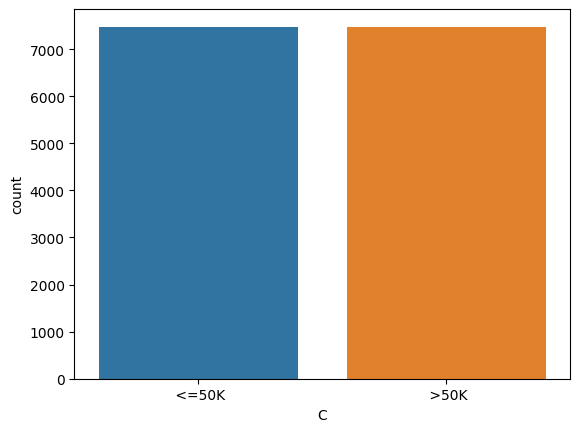

In [ ]:
sns.countplot(data=dataBal,x='C',hue='C')

In [ ]:
dataBal.shape

(14954, 19)

### Split Data en Train y Test

In [ ]:
from sklearn.model_selection import train_test_split

num_variables = ['Age','Hpw','Education_f',
       'Marital-status_f', 'Occupation_f', 'Sex_f', 'Country_f']

# Dividimos el conjunto de datos en muestras de train y test
X = dataBal.drop("C", axis = 1)[num_variables]
y = dataBal["C"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,Age,Hpw,Education_f,Marital-status_f,Occupation_f,Sex_f,Country_f
2420,34,65,5,0,5,0,0
729,47,43,1,2,1,1,0
8253,46,40,0,1,8,0,0
14569,39,48,0,1,3,0,0
6167,37,32,7,3,5,1,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns = num_variables)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns = num_variables)

X_train_scal.head()

,Age,Hpw,Education_f,Marital-status_f,Occupation_f,Sex_f,Country_f
2420,0.293103,0.653061,0.333333,0.000000,0.384615,0.0,0.0
729,0.517241,0.428571,0.066667,0.333333,0.076923,1.0,0.0
8253,0.500000,0.397959,0.000000,0.166667,0.615385,0.0,0.0
14569,0.379310,0.479592,0.000000,0.166667,0.230769,0.0,0.0
6167,0.344828,0.316327,0.466667,0.500000,0.384615,1.0,0.0


### Seleccion de mejores variables para hacer las predicciones con el modelo

In [ ]:
from sklearn.feature_selection import f_classif, SelectKBest

# Con un valor de k = 6 decimos implícitamente que queremos eliminar 4 características del conjunto de datos
selection_model = SelectKBest(f_classif, k = 5)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,Age,Hpw,Education_f,Occupation_f,Sex_f
0,34,65,5,5,0
1,47,43,1,1,1
2,46,40,0,8,0
3,39,48,0,3,0
4,37,32,7,5,1


In [ ]:
print(X_train_sel.columns)
nombre_cols=['Age','Hpw','Education_f','Occupation_f','Sex_f']
print(X_train_sel)

Index(['Age', 'Hpw', 'Education_f', 'Occupation_f', 'Sex_f'], dtype='object')
       Age  Hpw  Education_f  Occupation_f  Sex_f
0       34   65            5             5      0
1       47   43            1             1      1
2       46   40            0             8      0
3       39   48            0             3      0
4       37   32            7             5      1
...    ...  ...          ...           ...    ...
11958   53   35            1             5      1
11959   40   40            1             9      0
11960   45   40           11             7      0
11961   17    6           15             5      1
11962   23   40            1            11      0

[11963 rows x 5 columns]


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train_sel)

X_train_scal = scaler.transform(X_train_sel)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train_sel.index, columns = nombre_cols)

X_test_scal = scaler.transform(X_test_sel)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test_sel.index, columns = nombre_cols)

X_train_scal.head()

,Age,Hpw,Education_f,Occupation_f,Sex_f
0,0.293103,0.653061,0.333333,0.384615,0.0
1,0.517241,0.428571,0.066667,0.076923,1.0
2,0.500000,0.397959,0.000000,0.615385,0.0
3,0.379310,0.479592,0.000000,0.230769,0.0
4,0.344828,0.316327,0.466667,0.384615,1.0


### Inicialización y entrenamiento del modelo

In [ ]:
model = LogisticRegression()
model.fit(X_train_scal, y_train)

LogisticRegression()

### Predicciones y Confiabilidad del Modelo

In [ ]:
y_pred = model.predict(X_test_scal)
y_pred

array([' >50K', ' >50K', ' >50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype=object)

In [ ]:
accuracy_score(y_test, y_pred)

0.7168171180207289

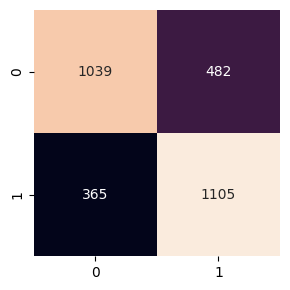

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

trab = confusion_matrix(y_test, y_pred)

# Dibujaremos esta matriz para hacerla más visual
trab_df = pd.DataFrame(trab)

plt.figure(figsize = (3, 3))
sns.heatmap(trab_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.74      0.68      0.71      1521
        >50K       0.70      0.75      0.72      1470

    accuracy                           0.72      2991
   macro avg       0.72      0.72      0.72      2991
weighted avg       0.72      0.72      0.72      2991



In [ ]:
print(type(y_pred))

<class 'numpy.ndarray'>


In [ ]:
y_test_prob=pd.DataFrame(y_test)
y_test_bin=pd.DataFrame(columns=['C_f'])
y_test_bin["C_f"] = pd.factorize(y_test_prob["C"])[0]

In [ ]:
from sklearn.metrics import roc_curve, auc
y_pred_proba=model.predict_proba(X_test_scal)[:, 1]
fpr, tpr, _ = roc_curve(y_test_bin, y_pred_proba)
auc_value = auc(fpr, tpr)


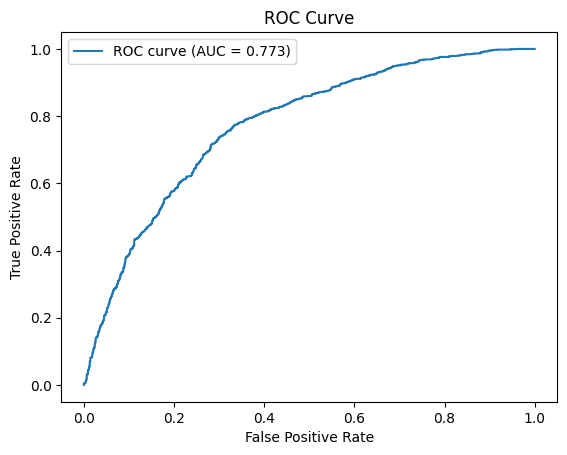

In [ ]:
# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.3f})'.format(auc_value))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Metodos de Optimizacion

### 1. Búsqueda en cuadrícula

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definimos los parámetros que queremos ajustar a mano
hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100,500, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# Inicializamos la cuadrícula
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 7)
grid

GridSearchCV(cv=7, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 500, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [ ]:
grid.fit(X_train_scal, y_train)

print(f"Mejores hiperparámetros: {grid.best_params_}")

Mejores hiperparámetros: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}


In [ ]:
model_grid = LogisticRegression(penalty = "l2", C = 1, solver = "liblinear")
model_grid.fit(X_train_scal, y_train)
y_pred = model_grid.predict(X_test_scal)

grid_accuracy = accuracy_score(y_test, y_pred)
grid_accuracy

0.7171514543630892

### 2. Búsqueda aleatoria


In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

# Definimos los parámetros que queremos ajustar
hyperparams = {
    "C": np.logspace(-4, 4, 20),
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# Inicializamos la búsqueda aleatoria
random_search = RandomizedSearchCV(model, hyperparams, n_iter = 100, scoring = "accuracy", cv = 5, random_state = 42)
random_search

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=42, scoring='accuracy')

In [ ]:
random_search.fit(X_train_scal, y_train)

print(f"Mejores hiperparámetros: {random_search.best_params_}")

Mejores hiperparámetros: {'solver': 'saga', 'penalty': 'l1', 'C': 0.012742749857031334}


In [ ]:
model_random_search = LogisticRegression(penalty = "l1", C = 0.012742749857031334, solver = "saga")
model_random_search.fit(X_train_scal, y_train)
y_pred = model_random_search.predict(X_test_scal)

random_search_accuracy = accuracy_score(y_test, y_pred)
random_search_accuracy

0.7128050819124039

In [ ]:
from sklearn.metrics import roc_curve, auc
y_pred_proba=model_grid.predict_proba(X_test_scal)[:, 1]
fpr, tpr, _ = roc_curve(y_test_bin, y_pred_proba)
auc_value = auc(fpr, tpr)

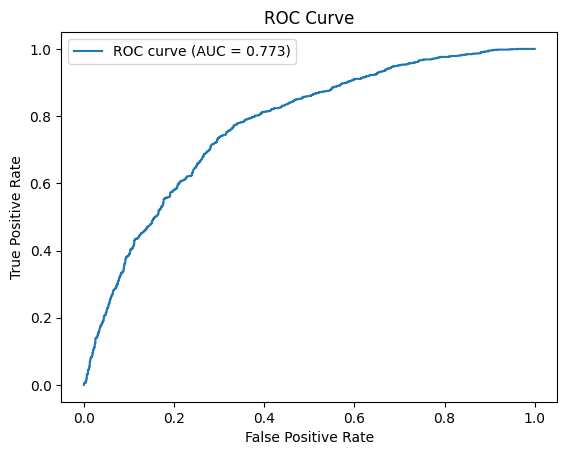

In [ ]:
# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.3f})'.format(auc_value))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
importancia_coeficientes = model_random_search.coef_[0]
feature_names = [X_train_scal][0]
importance_dict = dict(zip(feature_names, importancia_coeficientes))

print(importance_dict)

{'Age': 2.164864093673978, 'Hpw': 1.695260914407886, 'Education_f': 0.0, 'Occupation_f': -0.643840426048436, 'Sex_f': -1.0184271102449993}


,Age,Hpw,Education_f,Occupation_f,Sex_f
0,2.164864,1.695261,0.0,-0.64384,-1.018427


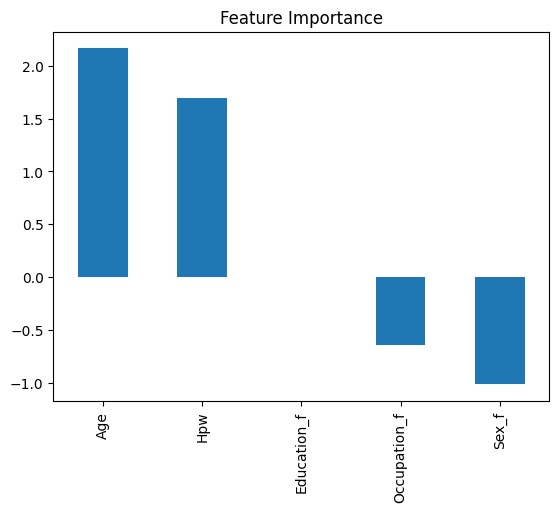

In [ ]:
# Visualize feature importance
features_df = pd.DataFrame(importance_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False)
features_df

In [ ]:
y_pred = model_grid.predict(X_test_scal)
y_pred

array([' >50K', ' >50K', ' >50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype=object)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.74      0.68      0.71      1521
        >50K       0.70      0.75      0.72      1470

    accuracy                           0.72      2991
   macro avg       0.72      0.72      0.72      2991
weighted avg       0.72      0.72      0.72      2991



Modelo Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train_scal, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
#from sklearn import tree
#fig = plt.figure(figsize=(15,15))

#tree.plot_tree(model, feature_names = list(X_train_scal.columns), class_names = ["0", "1"], filled = True)

#plt.show()

In [ ]:
y_pred1 = model.predict(X_test_scal)
y_pred1

array([' <=50K', ' >50K', ' >50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype=object)

In [ ]:
print(f"Accuracy Score: {accuracy_score(y_test, y_pred1)}")
predicciones_exactas = accuracy_score(y_test, y_pred1, normalize=False)
print("El número de predicciones exactas es: ", predicciones_exactas)

Accuracy Score: 0.7044466733533935
El número de predicciones exactas es:  2107


## Optimizacion de Parametros
### RandomizedSearchCV

In [ ]:
dt_space={'max_depth':[None, 50,100,500,1000],
           'max_features':[3,4,5],
           'criterion':['gini','entropy'],
           'min_samples_leaf':[1,2,3,4],
           'min_samples_split':np.arange(2, 10, step=2)
          }

In [ ]:
dt = DecisionTreeClassifier()
dt_random = RandomizedSearchCV(dt, dt_space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=5)
model_random = dt_random.fit(X_train_scal, y_train)

In [ ]:
print(f'Mejores Hiperparametros:: {model_random.best_params_}')
print(f'Mejor random search score es: {model_random.best_score_}')

Mejores Hiperparametros:: {'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 3, 'max_depth': 1000, 'criterion': 'entropy'}
Mejor random search score es: 0.7240651034860596


In [ ]:
model_rd = DecisionTreeClassifier(criterion='entropy',max_depth=1000,
           max_features=3, min_samples_leaf=4, min_samples_split=4,
           random_state=42)

model_rd.fit(X_train_scal, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1000, max_features=3,
                       min_samples_leaf=4, min_samples_split=4,
                       random_state=42)

In [ ]:
y_pred_rd = model_rd.predict(X_test_scal)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred_rd)}")
predicciones_exactas = accuracy_score(y_test, y_pred_rd, normalize=False)
print("El número de predicciones exactas es: ", predicciones_exactas)

Accuracy Score: 0.7422266800401204
El número de predicciones exactas es:  2220


### GridSearch

In [ ]:
grid_space={'max_depth':[1000,1500],
           'max_features':[3,4,5],
           'criterion':['entropy'],
           'min_samples_leaf':[3,4,5],
           'min_samples_split':[3,4,5]
          }

In [ ]:
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt, param_grid=grid_space, scoring='accuracy', cv=5)
model_grid = dt_grid.fit(X_train_scal, y_train)

In [ ]:
print(f'Mejores Hiperparametros:: {model_grid.best_params_}')
print(f'Mejor random search score es: {model_grid.best_score_}')

Mejores Hiperparametros:: {'criterion': 'entropy', 'max_depth': 1000, 'max_features': 3, 'min_samples_leaf': 5, 'min_samples_split': 5}
Mejor random search score es: 0.7261545309829255


In [ ]:
model_gr = DecisionTreeClassifier(criterion='entropy',max_depth=1000,
           max_features=3, min_samples_leaf=5, min_samples_split=5,
           random_state=42)

model_gr.fit(X_train_scal, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1000, max_features=3,
                       min_samples_leaf=5, min_samples_split=5,
                       random_state=42)

In [ ]:
y_pred_gr = model_gr.predict(X_test_scal)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred_gr)}")
predicciones_exactas = accuracy_score(y_test, y_pred_gr, normalize=False)
print("El número de predicciones exactas es: ", predicciones_exactas)

Accuracy Score: 0.7442326980942828
El número de predicciones exactas es:  2226


## RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model1 = RandomForestClassifier(random_state = 42)
model1.fit(X_train_scal, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred2 = model1.predict(X_test_scal)
y_pred2

array([' >50K', ' >50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype=object)

In [ ]:
print(f"Accuracy Score: {accuracy_score(y_test, y_pred2)}")
predicciones_exactas = accuracy_score(y_test, y_pred2, normalize=False)
print("El número de predicciones exactas es: ", predicciones_exactas)

Accuracy Score: 0.7295218990304246
El número de predicciones exactas es:  2182


### RandomizedSearchCV

In [ ]:
param_grid = {
    'n_estimators': [50],
    'max_features': [5],
    'max_depth': [20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [2, 4]
}

modelrf_rd = RandomizedSearchCV(estimator=model1, param_distributions=param_grid, scoring='accuracy',cv=5, n_jobs=-1, verbose=2)

modelrf_rd.fit(X_train_scal, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [20], 'max_features': [5],
                                        'min_samples_leaf': [2, 4],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [50]},
                   scoring='accuracy', verbose=2)

In [ ]:
print(f'Mejores Hiperparametros:: {modelrf_rd.best_params_}')
print(f'Mejor random search score es: {modelrf_rd.best_score_}')

Mejores Hiperparametros:: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 5, 'max_depth': 20}
Mejor random search score es: 0.7469685132360689


In [ ]:
model1 = RandomForestClassifier(n_estimators=50 ,max_features=5 , max_depth=20 ,
    min_samples_split=2 , min_samples_leaf=4, random_state = 42)

model1.fit(X_train_scal, y_train)

RandomForestClassifier(max_depth=20, max_features=5, min_samples_leaf=4,
                       n_estimators=50, random_state=42)

In [ ]:
y_pred2 = model1.predict(X_test_scal)
y_pred2

array([' >50K', ' >50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype=object)

In [ ]:
print(f"Accuracy Score: {accuracy_score(y_test, y_pred2)}")
predicciones_exactas = accuracy_score(y_test, y_pred2, normalize=False)
print("El número de predicciones exactas es: ", predicciones_exactas)

Accuracy Score: 0.7549314610498161
El número de predicciones exactas es:  2258


## Boosting

In [ ]:
y_train=pd.DataFrame(y_train)
#y_train.value_counts()
y_train['C_f']=pd.factorize(y_train['C'])[0]
y_train_f=pd.Series(y_train['C_f'])
y_train_f


2420     0
729      0
8253     1
14569    1
6167     0
        ..
5191     0
13418    1
5390     0
860      0
7270     0
Name: C_f, Length: 11963, dtype: int64

In [ ]:
y_test=pd.DataFrame(y_test)
#y_test.value_counts()
y_test['C_f']=pd.factorize(y_test['C'])[0]
y_test_f=pd.Series(y_test['C_f'])
y_test_f


3921     0
14843    1
6669     0
10315    1
14870    1
        ..
107      0
10302    1
367      0
4244     0
416      0
Name: C_f, Length: 2991, dtype: int64

In [ ]:
from xgboost import XGBClassifier

model2 = XGBClassifier(random_state = 42)
model2.fit(X_train_scal, y_train_f)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred3 = model2.predict(X_test_scal)
y_pred3

array([1, 1, 0, ..., 0, 1, 0])

In [ ]:
print(f"Accuracy Score: {accuracy_score(y_test_f, y_pred3)}")
predicciones_exactas = accuracy_score(y_test_f, y_pred3, normalize=False)
print("El número de predicciones exactas es: ", predicciones_exactas)

Accuracy Score: 0.7642928786359077
El número de predicciones exactas es:  2286


RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np


#Espacio de búsqueda de cada hiper parámetro para XGBOOST

xg_rsv = {"n_estimators": np.arange(50,450, 50),
          "max_depth": [None, 3, 5, 10,15,20,30],
          "min_samples_split": np.arange(2,20, 2),
          "min_samples_leaf": np.arange(2, 20, 2),
          "max_features": [1,3,5,10,"sqrt","auto"],
          "learning_rate": [0.01, 0.1, 0.2,0.5],
          "gamma": [0, 0.1, 0.4],
          }

# Búsqueda por validación cruzada para XGBRegressor
xg_model = RandomizedSearchCV(XGBClassifier(),
                              param_distributions=xg_rsv,
                              scoring    = 'accuracy',
                              n_iter=5,
                              cv=5,
                              n_jobs = -1,
                              verbose=True,
                              random_state=42)

xg_model.fit(X_train, y_train_f)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                   param_distributions={'gamma': [0, 0.1, 0.4],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.5],
                                        'max_depth': [None, 3, 5, 10, 15, 20,
                                                      30],
                                        'max_features': [1, 3, 5, 10, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400])},
                   random_state=42, scoring='accuracy', verbose=True)

In [ ]:
print(f'Mejores Hiperparametros:: {xg_model.best_params_}')
print(f'Mejor random search score es: {xg_model.best_score_}')

Mejores Hiperparametros:: {'n_estimators': 200, 'min_samples_split': 16, 'min_samples_leaf': 12, 'max_features': 'sqrt', 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.1}
Mejor random search score es: 0.8095785226419867


In [ ]:
model2 = XGBClassifier(n_estimators=200,min_samples_split=16,
                       min_samples_leaf=12, max_features='sqrt', max_depth=5, learning_rate=0.1, gamma=0.1, random_state = 42)
model2.fit(X_train_scal, y_train_f)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_features='sqrt',
              max_leaves=None, min_child_weight=None, min_samples_leaf=12,
              min_samples_split=16, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, ...)

In [ ]:
y_pred4 = model2.predict(X_test_scal)
y_pred4

array([1, 1, 0, ..., 0, 1, 0])

In [ ]:
print(f"Accuracy Score: {accuracy_score(y_test_f, y_pred4)}")
predicciones_exactas = accuracy_score(y_test_f, y_pred4, normalize=False)
print("El número de predicciones exactas es: ", predicciones_exactas)

Accuracy Score: 0.7636242059511869
El número de predicciones exactas es:  2284


GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

#Espacio de búsqueda de cada hiper parámetro para XGBOOST

xg_grid = {"n_estimators": [200,350,400],
          "max_depth": [5,10],
          "min_samples_leaf": [12,14],
          "learning_rate": [0.1,0.2],
          "gamma": [0.1,0.2],
          }

# Búsqueda por validación cruzada para XGBRegressor
xg_model_grid = GridSearchCV(XGBClassifier(),
                              param_grid=xg_grid,
                              scoring    = 'accuracy',
                              cv=5,
                              n_jobs = -1,
                              verbose=True)

xg_model_grid.fit(X_train, y_train_f)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'gamma': [0.1, 0.2], 'learning_rate': [0.1, 0.2],
                         'max_depth': [5, 10], 'min_samples_leaf': [12, 14],
                         'n_estimators': [200, 350, 400]},
             scoring='accuracy', verbose=True)

In [ ]:
print(f'Mejores Hiperparametros:: {xg_model_grid.best_params_}')
print(f'Mejor grid search score es: {xg_model_grid.best_score_}')

Mejores Hiperparametros:: {'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 12, 'n_estimators': 200}
Mejor grid search score es: 0.8095785226419867


In [ ]:
model2 = XGBClassifier(n_estimators=200,min_samples_leaf=12, max_features='sqrt', max_depth=5, learning_rate=0.1, gamma=0.1, random_state = 42)
model2.fit(X_train_scal, y_train_f)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_features='sqrt',
              max_leaves=None, min_child_weight=None, min_samples_leaf=12,
              missing=nan, monotone_constraints=None, multi_strategy=None,
              n_estimators=200, n_jobs=None, ...)